In [22]:
from pyDeepInsight import ImageTransformer, LogScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import tensorflow.keras
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical

from matplotlib import pyplot as plt
import seaborn as sns

In [23]:
prosody_data = pd.read_csv('Prosodic_Features_MRH.csv',sep=",")
#expr = pd.read_csv(expr_file, sep="\t")
y = prosody_data['Hired3C'].values
X = prosody_data[['pitch_quant', 'meanPeriod', 'mean_pitch', 'fmean3', 'f3STD', 'f2STD', 'pitch_sd', 'shimmer', 'avgBand2', 'intensityMean', 'jitter', 'intensitySD', 'intensityQuant', 'jitterRap', 'f1STD', 'avgVal2', 'fmean2', 'PercentBreaks', 'AvgTotFall:3', 'f2STDf1', 'pitch_abs', 'f2STDf2', 'avgBand1', 'percentUnvoiced', 'AvgTotRis:3']]
#X = prosody_data.iloc[:, 2:].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=23, stratify=y)
X_train.shape

(612, 25)

In [24]:
ln = LogScaler()
X_train_norm = ln.fit_transform(X_train)
X_test_norm = ln.transform(X_test)
X_train_norm

,pitch_quant,meanPeriod,mean_pitch,fmean3,f3STD,f2STD,pitch_sd,shimmer,avgBand2,intensityMean,...,avgVal2,fmean2,PercentBreaks,AvgTotFall:3,f2STDf1,pitch_abs,f2STDf2,avgBand1,percentUnvoiced,AvgTotRis:3
139,0.971731,0.617810,0.967129,0.996494,0.973565,0.978077,0.867488,0.805149,0.976788,0.975162,...,0.992503,0.992503,0.727749,0.851904,0.895220,0.869331,0.934597,0.951085,0.765888,0.817064
23,0.900585,0.886787,0.907835,0.997480,0.965270,0.988683,0.761015,0.897628,0.989893,0.973838,...,0.993420,0.993420,0.738542,0.728833,0.909771,0.839448,0.880759,0.952775,0.727361,0.799965
218,0.990245,0.566441,0.985258,0.996823,0.978184,0.977099,0.863518,0.820578,0.961904,0.987937,...,0.993565,0.993565,0.729152,0.845344,0.861029,0.930730,0.921785,0.946741,0.749730,0.920846
679,0.923376,0.770100,0.928360,0.995138,0.984178,0.987020,0.762595,0.845168,0.980145,0.984923,...,0.991158,0.991158,0.677190,0.613532,0.897905,0.834099,0.942684,0.959561,0.674109,0.812573
84,0.964372,0.625969,0.964601,0.996997,0.964868,0.988278,0.818780,0.775137,0.965111,0.982261,...,0.991763,0.991763,0.628895,0.781511,0.933910,0.890570,0.900770,0.945077,0.625929,0.849616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,0.971396,0.621187,0.965914,0.997069,0.966802,0.971966,0.870682,0.841897,0.971384,0.970334,...,0.992641,0.992641,0.703321,0.855112,0.826539,0.913489,0.867281,0.956622,0.741825,0.859371
635,0.967214,0.637910,0.960151,0.996543,0.979798,0.984894,0.890925,0.824313,0.988128,0.978874,...,0.993111,0.993111,0.586265,0.767657,0.876426,0.905406,0.914296,0.962136,0.654952,0.898022
602,0.990427,0.561048,0.988247,0.993869,0.960584,0.972851,0.777472,0.777705,0.968941,0.988062,...,0.992382,0.992382,0.487590,0.701344,0.910622,0.890309,0.919314,0.923227,0.502446,0.833819
311,0.992602,0.561693,0.987889,0.993941,0.957012,0.979049,0.867913,0.839405,0.983642,0.980046,...,0.989148,0.989148,0.605905,0.860690,0.982293,0.959022,0.943942,0.931582,0.608585,0.924470


In [25]:
it = ImageTransformer(feature_extractor='tsne', 
                      pixels=5, random_state=1701, 
                      n_jobs=-1)

C:\Users\Anagha\anaconda3\envs\tf\lib\site-packages\sklearn\manifold\_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


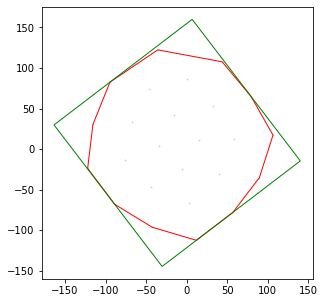

In [28]:
plt.figure(figsize=(5, 5))
it.fit(X_train_norm, plot=True)

(5, 5)

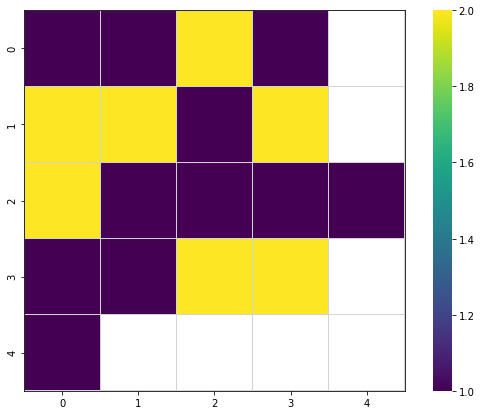

In [27]:
fdm = it.feature_density_matrix()
fdm[fdm == 0] = np.nan

plt.figure(figsize=(10, 7))

ax = sns.heatmap(fdm, cmap="viridis", linewidths=0.01, 
                 linecolor="lightgrey", square=True)
for _, spine in ax.spines.items():
    spine.set_visible(True)
    
fdm.shape


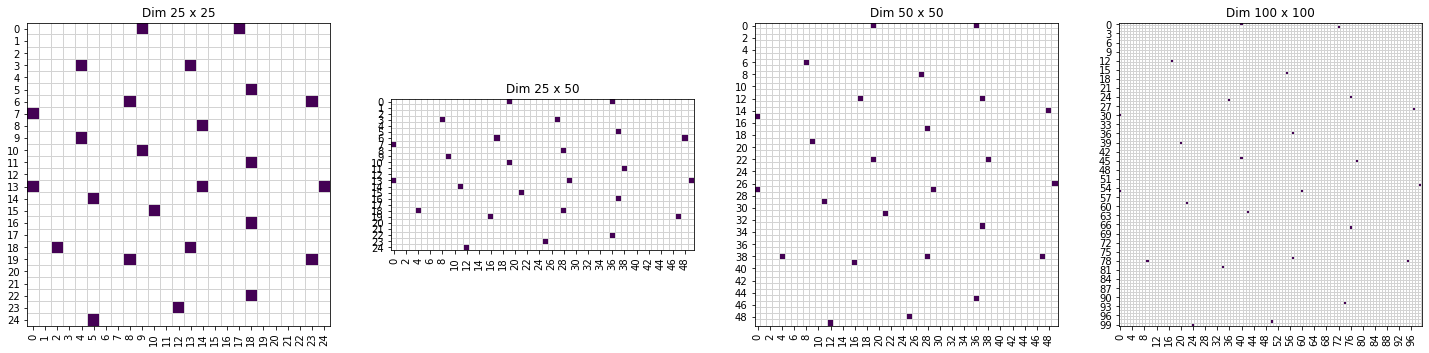

In [31]:
px_sizes = [25, (25, 50), 50, 100]

fig, ax = plt.subplots(1, len(px_sizes), figsize=(25, 7))
for ix, px in enumerate(px_sizes):
    it.pixels = px
    fdm = it.feature_density_matrix()
    fdm[fdm == 0] = np.nan
    cax = sns.heatmap(fdm, cmap="viridis", linewidth=0.01, 
                      linecolor="lightgrey", square=True, 
                      ax=ax[ix], cbar=False)
    cax.set_title('Dim {} x {}'.format(*it.pixels))
    for _, spine in cax.spines.items():
        spine.set_visible(True)

it.pixels = 5

In [32]:
mat_train = it.transform(X_train_norm)
print(mat_train.shape)

mat_train

(612, 5, 5, 3)


array([[[[0.80514855, 0.80514855, 0.80514855],
         [0.97516219, 0.97516219, 0.97516219],
         [0.67055613, 0.67055613, 0.67055613],
         [0.89522042, 0.89522042, 0.89522042],
         [0.        , 0.        , 0.        ]],

        [[0.9655455 , 0.9655455 , 0.9655455 ],
         [0.91273456, 0.91273456, 0.91273456],
         [0.97173097, 0.97173097, 0.97173097],
         [0.78956473, 0.78956473, 0.78956473],
         [0.        , 0.        , 0.        ]],

        [[0.89516506, 0.89516506, 0.89516506],
         [0.8674883 , 0.8674883 , 0.8674883 ],
         [0.8640088 , 0.8640088 , 0.8640088 ],
         [0.76588805, 0.76588805, 0.76588805],
         [0.86933062, 0.86933062, 0.86933062]],

        [[0.95108545, 0.95108545, 0.95108545],
         [0.36313119, 0.36313119, 0.36313119],
         [0.97981601, 0.97981601, 0.97981601],
         [0.98464508, 0.98464508, 0.98464508],
         [0.        , 0.        , 0.        ]],

        [[0.72774864, 0.72774864, 0.72774864],
     

In [54]:
print(mat_train[0,:,:].size)
mat_train[0,:,:]

75


array([[[0.84626575, 0.84626575, 0.84626575],
        [0.98164571, 0.98164571, 0.98164571],
        [0.71153681, 0.71153681, 0.71153681],
        [0.88640969, 0.88640969, 0.88640969],
        [0.        , 0.        , 0.        ]],

       [[0.9529187 , 0.9529187 , 0.9529187 ],
        [0.90000731, 0.90000731, 0.90000731],
        [0.94045275, 0.94045275, 0.94045275],
        [0.8371925 , 0.8371925 , 0.8371925 ],
        [0.        , 0.        , 0.        ]],

       [[0.91828013, 0.91828013, 0.91828013],
        [0.85102868, 0.85102868, 0.85102868],
        [0.86131513, 0.86131513, 0.86131513],
        [0.69839508, 0.69839508, 0.69839508],
        [0.92499054, 0.92499054, 0.92499054]],

       [[0.94109231, 0.94109231, 0.94109231],
        [0.42745419, 0.42745419, 0.42745419],
        [0.96611718, 0.96611718, 0.96611718],
        [0.9795024 , 0.9795024 , 0.9795024 ],
        [0.        , 0.        , 0.        ]],

       [[0.74268213, 0.74268213, 0.74268213],
        [0.        , 0.   

In [55]:
mat_test = it.transform(X_test_norm)
mat_test.shape


(68, 5, 5, 3)

In [35]:
classes = np.unique(y_train)

nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  3
Output classes :  [0 1 2]


Text(0.5, 1.0, 'Ground Truth : 0')

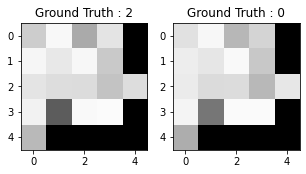

In [36]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(mat_train[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(y_train[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(mat_test[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(y_test[0]))



Text(0.5, 1.0, 'Ground Truth : 1')

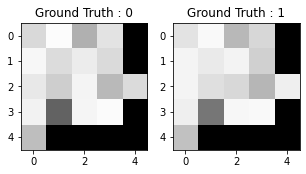

In [37]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(mat_train[300,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(y_train[300]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(mat_test[11,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(y_test[11]))


Text(0.5, 1.0, 'Ground Truth : 2')

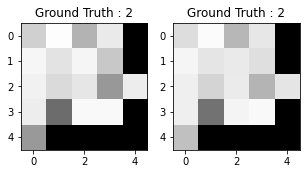

In [38]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(mat_train[209,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(y_train[209]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(mat_test[30,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(y_test[30]))




In [42]:
train_X = mat_train
test_X = mat_test
train_X.shape, test_X.shape


((612, 5, 5, 3), (68, 5, 5, 3))

In [56]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

In [57]:

train_Y = y_train
test_Y =y_test
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])
print('Original label:', train_Y[300])
print('After conversion to one-hot:', train_Y_one_hot[300])
print('Original label:', train_Y[109])
print('After conversion to one-hot:', train_Y_one_hot[109])

Original label: 2
After conversion to one-hot: [0. 0. 1.]
Original label: 0
After conversion to one-hot: [1. 0. 0.]
Original label: 1
After conversion to one-hot: [0. 1. 0.]


In [58]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.1, random_state=13)


ValueError: Found input variables with inconsistent numbers of samples: [550, 612]

In [59]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((550, 5, 5, 3), (62, 5, 5, 3), (550, 3), (62, 3))

In [60]:
batch_size = 64
epochs = 10
num_classes = 3


In [61]:

fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(5,5,3),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(Dense(num_classes, activation='softmax'))

fashion_model.compile(loss=tensorflow.keras.losses.categorical_crossentropy, optimizer=tensorflow.keras.optimizers.Adam(),metrics=['accuracy'])
fashion_model.summary()

fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 5, 5, 32)          896       
_________________________________________________________________
leaky_re_lu_16 (LeakyReLU)   (None, 5, 5, 32)          0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 3, 3, 64)          18496     
_________________________________________________________________
leaky_re_lu_17 (LeakyReLU)   (None, 3, 3, 64)          0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 2, 2, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 2, 2, 128)        

In [62]:
top_model_weights_path = 'fc_model.h5'
import datetime
start = datetime.datetime.now()
model = Sequential() 
model.add(Flatten(input_shape=train_X.shape[1:])) 
model.add(Dense(100, activation=tensorflow.keras.layers.LeakyReLU(alpha=0.3))) 
model.add(Dropout(0.5)) 
model.add(Dense(50, activation=tensorflow.keras.layers.LeakyReLU(alpha=0.3))) 
model.add(Dropout(0.3)) 
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy',
   optimizer=optimizers.RMSprop(lr=1e-4),
   metrics=['acc'])
history = model.fit(train_X, train_label, 
   epochs=10,
   batch_size=batch_size, 
   validation_data=(valid_X, valid_label))
model.save_weights(top_model_weights_path)
(eval_loss, eval_accuracy) = model.evaluate( 
    valid_X, valid_label, batch_size=batch_size,     verbose=1)
print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100)) 
print("[INFO] Loss: {}".format(eval_loss)) 
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Epoch 1/10
9/9 [==============================] - 0s 17ms/step - loss: 1.0987 - acc: 0.3236 - val_loss: 1.0989 - val_acc: 0.2742
Epoch 2/10
9/9 [==============================] - 0s 4ms/step - loss: 1.0986 - acc: 0.3309 - val_loss: 1.0989 - val_acc: 0.2742
Epoch 3/10
9/9 [==============================] - 0s 4ms/step - loss: 1.0987 - acc: 0.3382 - val_loss: 1.0990 - val_acc: 0.2742
Epoch 4/10
9/9 [==============================] - 0s 4ms/step - loss: 1.0986 - acc: 0.3400 - val_loss: 1.0990 - val_acc: 0.2742
Epoch 5/10
9/9 [==============================] - 0s 5ms/step - loss: 1.0986 - acc: 0.3436 - val_loss: 1.0992 - val_acc: 0.2742
Epoch 6/10
9/9 [==============================] - 0s 5ms/step - loss: 1.0986 - acc: 0.3436 - val_loss: 1.0993 - val_acc: 0.2742
Epoch 7/10
9/9 [==============================] - 0s 5ms/step - loss: 1.0986 - acc: 0.3309 - val_loss: 1.0993 - val_acc: 0.2742
Epoch 8/10
9/9 [==============================] - 0s 4ms/step - loss: 1.0986 - acc: 0.3400 - val_loss: 